### 1)  load the dataset from the weatherinszeged data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('weatherinszeged.csv')

### 2) Build a linear regression model where your target variable is the difference between the apparenttemperature and the temperature. As explanatory variables, use humidity and windspeed. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables?


#### 2.1 - Build a Linear Regression Model

In [3]:
df['tempdiff'] = df['apparenttemperature'] - df['temperature']

First is to plot the distribution of the temperature difference ('tempdiff') between temperature and apparnenttemperature ('tempdiff') as well as the relationship between 'tempdiff' and humidity and windspeed.

Looking at the distribution plot of 'tempdiff', it appears that most of the time, the temperature and apparent temperature are the same, creating a peak at/near 0.  Else there are some where the temperature is lower than the apparent temperature, but most of the time the temperature is higher than the apparent temperature.  

This peak at 0 'tempdiff' creates interesting plots when looking at the relationship between humidity and wind speed with 'tempdiff', as it creates a very prominent line at y = 0 for both plots.  From the humidity plot, it is difficult to visually extract any relationship with 'tempdiff'.  From the wind speed plot, there appears to be a slight inverse relationship with 'tempdiff', but the relationship is not strong.

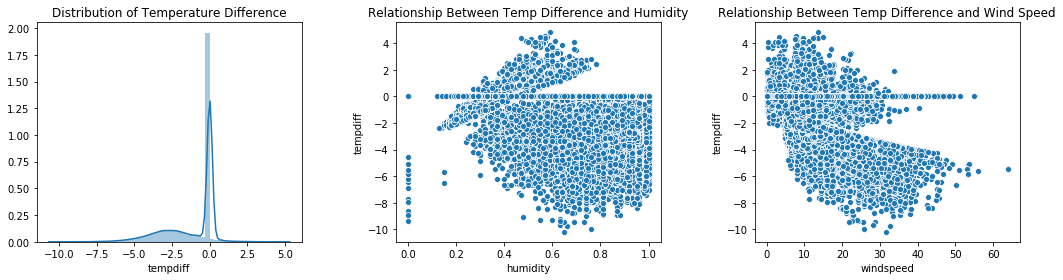

In [10]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize = (15,4))

sns.distplot(df['tempdiff'], ax = axis1)
sns.scatterplot(x = 'humidity', y = 'tempdiff', data = df, ax = axis2)
sns.scatterplot(x = 'windspeed', y = 'tempdiff', data = df, ax = axis3)

axis1.set_title('Distribution of Temperature Difference')
axis2.set_title('Relationship Between Temp Difference and Humidity')
axis3.set_title('Relationship Between Temp Difference and Wind Speed')

plt.tight_layout()

In [4]:
Y = df['tempdiff']
X = df[['humidity', 'windspeed']]
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               tempdiff   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Thu, 05 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:39:30   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.0

From the OLS summary, the equation is  

tempdiff = 2.4381 - (3.0292 \* humidity) - (0.01193 \* windspeed)

#### 2.2 - Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations?
To know if coefficients are statistically significant, look at the p-values.  Here, I'll say if p-values are under 0.1, then the coefficient is significant.  All of the p-values are 0, so they are all statistically significant.  Judging from the plots above, I expected wind speed to be significant but not necessarily humidity.  Although from personal experience, I expect both features to be significantly significant as 'tempdiff' would increase with windspeed and decrease with humidity.

####  2.3 - Interpret the estimated coefficients. What are the relations between the target and the explanatory variables?
Both humidity and wind speed are continuous variables.  For every unit that humidity increases, then 'tempdiff' decreases by 3.0292.  For every unit of windspeed, then 'tempdiff' decreases by 0.01193.

### 3) Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. 
The interaction term will be defined as multiplying humidity and windspeed ('humidwind').  The plot of 'humidwind' and 'tempdiff' looks pretty similar to that of 'windspeed' and 'tempdiff'.  

In [23]:
df['humidwind'] = df['windspeed'] * df['humidity']

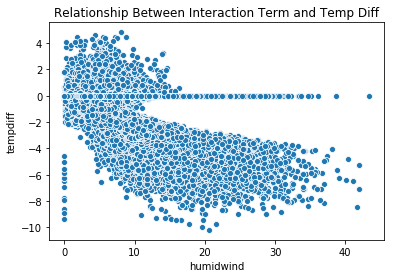

In [26]:
sns.scatterplot(x = 'humidwind', y = 'tempdiff', data = df)
plt.title('Relationship Between Interaction Term and Temp Diff')

In [25]:
Y2 = df['tempdiff']
X2 = df[['humidity', 'windspeed', 'humidwind']]
X2 = sm.add_constant(X2)
results2 = sm.OLS(Y2,X2).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:               tempdiff   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Thu, 05 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:19:27   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0839      0.033      2.511      0.0

#### 3.1 - Are the coefficients statistically significant? Did the signs of the estimated coefficients for humidity and windspeed change? 

The coefficients all have p-values under 0.1 and thus are statistically significant.  The signs of the coefficients for humidity and windspeed did change from negative to positive.

#### 3.2 - Interpret the estimated coefficients.
For one unit of humidity, the 'tempdiff' increases by 0.1775.  For one unit of windspeed, the 'tempdiff' increases by 0.0905, and for one unit of 'humidwind', the 'tempdiff' decreases by 0.2971.  